<a href="https://colab.research.google.com/github/Hanzlah10/CFA/blob/main/CounterFactual_Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score


In [4]:


# URL of the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'

# Define column names
columns = [
    'Pregnancies', 'Glucose', 'BP', 'SkinThickness',
    'Insulin', 'BMI', 'DPF', 'Age', 'Outcome'
]
# DiabetesPedigreeFunction

# Load the dataset with column names
data = pd.read_csv(url, header=None, names=columns)

# Display the first few rows
print(data.head())

   Pregnancies  Glucose  BP  SkinThickness  Insulin   BMI    DPF  Age  Outcome
0            6      148  72             35        0  33.6  0.627   50        1
1            1       85  66             29        0  26.6  0.351   31        0
2            8      183  64              0        0  23.3  0.672   32        1
3            1       89  66             23       94  28.1  0.167   21        0
4            0      137  40             35      168  43.1  2.288   33        1


In [5]:
data.describe()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.shape

(768, 9)

In [7]:
# Check for missing values
print(data.isnull().sum())



Pregnancies      0
Glucose          0
BP               0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64


In [25]:
total_samples = len(data)

# Count the number of samples for each class
class_counts = data['Outcome'].value_counts()
print(class_counts)

# Calculate the percentage for each class
percentages = (class_counts / total_samples) * 100

# Print the results
print("Class Percentages:")
for label, percentage in percentages.items():
    print(f" - Class {label}: {percentage:.2f}%")

Outcome
0    500
1    268
Name: count, dtype: int64
Class Percentages:
 - Class 0: 65.10%
 - Class 1: 34.90%


In [9]:
# Feature matrix X and target vector y
X = data.drop('Outcome', axis=1)  # 'Outcome' is the target variable
y = data['Outcome']


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


**ACCURACY BEFORE**

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
model_before = RandomForestClassifier(random_state=42)
model_before.fit(X_train, y_train)


y_pred_before = model_before.predict(X_test)
accuracy_before = accuracy_score(y_test, y_pred_before)
print(f"Accuracy before CFA: {accuracy_before * 100:.4f}%")


Accuracy before CFA: 72.7273%


In [42]:
# # prompt: give visualization of data in all possible ways

# import matplotlib.pyplot as plt
# import seaborn as sns

# # Histograms for each feature
# data.hist(figsize=(15, 12))
# plt.show()

# # Box plots for each feature
# data.plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 12))
# plt.show()

# # Correlation matrix heatmap
# correlation_matrix = data.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

# # Pairplot for visualizing relationships between features
# sns.pairplot(data, hue='Outcome') #hue for target variable coloring
# plt.show()

# # Scatter plots of important features vs. outcome
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.scatter(data['Glucose'], data['Outcome'])
# plt.xlabel('Glucose')
# plt.ylabel('Outcome')
# plt.title('Glucose vs Outcome')

# plt.subplot(1, 2, 2)
# plt.scatter(data['BMI'], data['Outcome'])
# plt.xlabel('BMI')
# plt.ylabel('Outcome')
# plt.title('BMI vs Outcome')
# plt.show()

# # Density plots for key features
# for col in ['Glucose', 'BMI', 'Age', 'Pregnancies']:
#     plt.figure(figsize=(8, 4))
#     sns.kdeplot(data[data['Outcome'] == 0][col], label='Outcome = 0')
#     sns.kdeplot(data[data['Outcome'] == 1][col], label='Outcome = 1')
#     plt.xlabel(col)
#     plt.ylabel('Density')
#     plt.title(f'Density Plot of {col} by Outcome')
#     plt.legend()
#     plt.show()





**Implement Counterfactual Data Augmentation (CFA)**



In [16]:
# Determine the majority and minority classes
minority_class = y_train.value_counts().idxmin()  # Minority class (either 0 or 1)
majority_class = y_train.value_counts().idxmax()  # Majority class (either 0 or 1)

# Identify the minority and majority class instances
minority_class_instances = X_train[y_train == minority_class]
majority_class_instances = X_train[y_train == majority_class]

# Use SHAP to identify influential features
baseline_model = RandomForestClassifier(random_state=42)
baseline_model.fit(X_train, y_train)

import shap  # Ensure SHAP is installed via `pip install shap`
explainer = shap.TreeExplainer(baseline_model)
shap_values = explainer.shap_values(X_train)

# Get the top 5 influential features for the minority class
important_features = np.argsort(np.abs(shap_values[minority_class]).mean(axis=0))[-5:]

# Generate counterfactuals using the identified features
counterfactuals = []

for minority_instance in minority_class_instances:
    # Find the closest majority instance based on important features
    minority_values = minority_instance[important_features]
    closest_majority_idx = np.argmin(
        np.linalg.norm(majority_class_instances[:, important_features] - minority_values, axis=1)
    )
    closest_majority_instance = majority_class_instances[closest_majority_idx]

    # Compute feature-wise difference and generate counterfactual
    feature_difference = closest_majority_instance - minority_instance
    counterfactual = minority_instance + 0.5 * feature_difference  # Adjust scaling factor as needed
    counterfactuals.append(counterfactual)

# Convert the counterfactuals to a DataFrame
counterfactuals = np.array(counterfactuals)
counterfactuals_df = pd.DataFrame(counterfactuals, columns=X.columns)

# Augment the dataset with counterfactuals
X_train_augmented = np.vstack([X_train, counterfactuals_df])
y_train_augmented = np.hstack([y_train, [minority_class] * len(counterfactuals)])

# Check the new shape of the features and labels
print("New feature shape:", X_train_augmented.shape)  # Should show original + counterfactual rows
print("New label shape:", y_train_augmented.shape)    # Should show original + counterfactual labels


New feature shape: (827, 8)
New label shape: (827,)


In [29]:
from collections import Counter

# Check class counts before and after augmentation
original_class_counts = Counter(y_train)  # Class counts before CFA
augmented_class_counts = Counter(y_train_augmented)  # Class counts after CFA

print("Class counts before and after CFA:\n")
for cls in sorted(set(original_class_counts.keys()).union(augmented_class_counts.keys())):
    print(f"For class {cls}:")
    print(f"  Before CFA: {original_class_counts.get(cls, 0)}")
    print(f"  After CFA: {augmented_class_counts.get(cls, 0)}\n")


Class counts before and after CFA:

For class 0:
  Before CFA: 401
  After CFA: 401

For class 1:
  Before CFA: 213
  After CFA: 426



In [17]:
# Determine the majority and minority classes
# minority_class = y_train.value_counts().idxmin()  # Minority class (either 0 or 1)
# majority_class = y_train.value_counts().idxmax()  # Majority class (either 0 or 1)

# # Identify the minority class instances
# minority_class_instances = X_train[y_train == minority_class]
# majority_class_instances = X_train[y_train == majority_class]


In [30]:
# from sklearn.neighbors import NearestNeighbors

# # Use Nearest Neighbors to find majority class instances closest to the minority class instances
# nn = NearestNeighbors(n_neighbors=1)
# nn.fit(majority_class_instances)

# # Generate counterfactuals for each minority class instance
# counterfactuals = []

# for minority_instance in minority_class_instances:  # Change here
#     # Find the nearest neighbor from the majority class
#     _, idx = nn.kneighbors([minority_instance])

#     # Access the majority instance using NumPy array indexing
#     majority_instance = majority_class_instances[idx[0][0]]

#     # Generate a counterfactual example (simple perturbation)
#     counterfactual = minority_instance + 0.5 * (majority_instance - minority_instance)  # Adjust the factor as needed
#     counterfactuals.append(counterfactual)

# # Convert the counterfactuals to a DataFrame
# counterfactuals = np.array(counterfactuals)
# counterfactuals_df = pd.DataFrame(counterfactuals, columns=X.columns)

In [31]:
# # Create a new dataset with original and counterfactual examples
# X_train_augmented = np.vstack([X_train, counterfactuals_df])
# y_train_augmented = np.hstack([y_train, [minority_class] * len(counterfactuals)])

# # Check the new shape of the features and labels
# print("New feature shape:", X_train_augmented.shape)  # Should show original + counterfactual rows
# print("New label shape:", y_train_augmented.shape)    # Should show original + counterfactual labels



In [18]:

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier on the augmented dataset
clf.fit(X_train_augmented, y_train_augmented)


RandomForestClassifier(random_state=42)

In [19]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate using classification report
print(classification_report(y_test, y_pred))

# Compute AUC
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print("AUC: ", roc_auc)

# Accuracy
accuracy_score_cfa = accuracy_score(y_test, y_pred)
print(f"Accuracy after CFA: {accuracy_score_cfa * 100:.4f}%")


              precision    recall  f1-score   support

           0       0.84      0.76      0.80        99
           1       0.63      0.75      0.68        55

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.75      0.76       154

AUC:  0.8007346189164372
Accuracy after CFA: 75.3247%


In [20]:
# Train the baseline model (without CFA)
clf_baseline = RandomForestClassifier(random_state=42)
clf_baseline.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [21]:
# Predict on the test set
y_pred_baseline = clf_baseline.predict(X_test)

# Evaluate using classification report
print("Baseline Model Classification Report:")
print(classification_report(y_test, y_pred_baseline))

# Compute AUC for baseline
roc_auc_baseline = roc_auc_score(y_test, clf_baseline.predict_proba(X_test)[:, 1])
print("Baseline AUC: ", roc_auc_baseline)

#Accuracy
accuracy_score_baseline = accuracy_score(y_test, y_pred_baseline)
print(f"Accuracy before CFA: {accuracy_score_baseline * 100:.4f}%")


Baseline Model Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

Baseline AUC:  0.813406795224977
Accuracy before CFA: 72.7273%


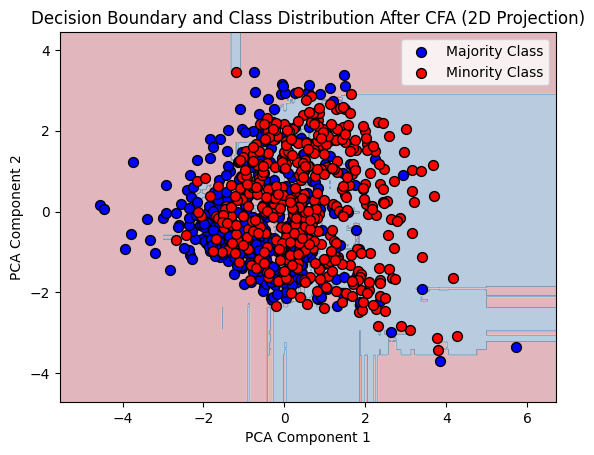

In [44]:
from sklearn.decomposition import PCA

# Reduce the dataset to 2D using PCA for visualization
pca = PCA(n_components=2)
X_train_augmented_2d = pca.fit_transform(X_train_augmented)

# Train the model on the reduced 2D data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_augmented_2d, y_train_augmented)

# Create a mesh grid for the reduced 2D data
h = .02  # Step size in the mesh
x_min, x_max = X_train_augmented_2d[:, 0].min() - 1, X_train_augmented_2d[:, 0].max() + 1
y_min, y_max = X_train_augmented_2d[:, 1].min() - 1, X_train_augmented_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class probabilities for each point in the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)

# Plot the majority and minority class points in the reduced 2D space
plt.scatter(X_train_augmented_2d[y_train_augmented == majority_class, 0],
            X_train_augmented_2d[y_train_augmented == majority_class, 1],
            c='blue', label='Majority Class', edgecolors='k', s=50)
plt.scatter(X_train_augmented_2d[y_train_augmented == minority_class, 0],
            X_train_augmented_2d[y_train_augmented == minority_class, 1],
            c='red', label='Minority Class', edgecolors='k', s=50)

plt.title('Decision Boundary and Class Distribution After CFA (2D Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


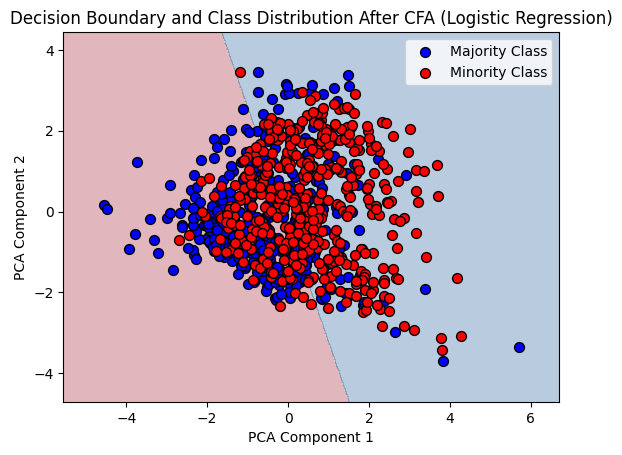

In [45]:
from sklearn.linear_model import LogisticRegression

# Train the model using Logistic Regression for better decision boundary visualization
clf_lr = LogisticRegression(random_state=42)
clf_lr.fit(X_train_augmented_2d, y_train_augmented)

# Create a mesh grid for the reduced 2D data
h = .02  # Step size in the mesh
x_min, x_max = X_train_augmented_2d[:, 0].min() - 1, X_train_augmented_2d[:, 0].max() + 1
y_min, y_max = X_train_augmented_2d[:, 1].min() - 1, X_train_augmented_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class probabilities for each point in the mesh grid
Z = clf_lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)

# Plot the majority and minority class points in the reduced 2D space
plt.scatter(X_train_augmented_2d[y_train_augmented == majority_class, 0],
            X_train_augmented_2d[y_train_augmented == majority_class, 1],
            c='blue', label='Majority Class', edgecolors='k', s=50)
plt.scatter(X_train_augmented_2d[y_train_augmented == minority_class, 0],
            X_train_augmented_2d[y_train_augmented == minority_class, 1],
            c='red', label='Minority Class', edgecolors='k', s=50)

plt.title('Decision Boundary and Class Distribution After CFA (Logistic Regression)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


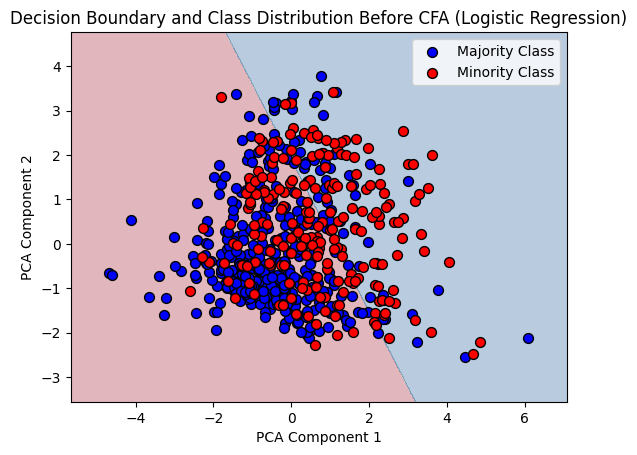

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Use PCA to reduce the dimensions of the data to 2D for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)

# Train the Logistic Regression model on the original data
clf_lr_before_cfa = LogisticRegression(random_state=42)
clf_lr_before_cfa.fit(X_train_2d, y_train)

# Create a mesh grid for the reduced 2D data
h = .02  # Step size in the mesh
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class probabilities for each point in the mesh grid
Z = clf_lr_before_cfa.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)

# Plot the majority and minority class points in the reduced 2D space
plt.scatter(X_train_2d[y_train == majority_class, 0],
            X_train_2d[y_train == majority_class, 1],
            c='blue', label='Majority Class', edgecolors='k', s=50)
plt.scatter(X_train_2d[y_train == minority_class, 0],
            X_train_2d[y_train == minority_class, 1],
            c='red', label='Minority Class', edgecolors='k', s=50)

plt.title('Decision Boundary and Class Distribution Before CFA (Logistic Regression)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


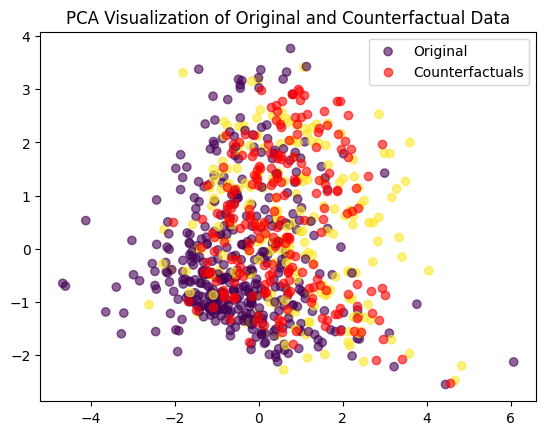

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
X_augmented_pca = pca.transform(X_train_augmented)

# Scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, label="Original", alpha=0.6)
plt.scatter(X_augmented_pca[len(X_train):, 0], X_augmented_pca[len(X_train):, 1], c='red', label="Counterfactuals", alpha=0.6)
plt.legend()
plt.title("PCA Visualization of Original and Counterfactual Data")
plt.show()


In [36]:
from sklearn.metrics import silhouette_score

# Labels: 0 for majority, 1 for minority
labels_augmented = np.concatenate([y_train, [minority_class] * len(counterfactuals)])
silhouette = silhouette_score(X_train_augmented, labels_augmented)
print("Overall Silhouette Score:", silhouette)


Overall Silhouette Score: 0.06277647596985647


**Before Vs After CFA Distribution.**

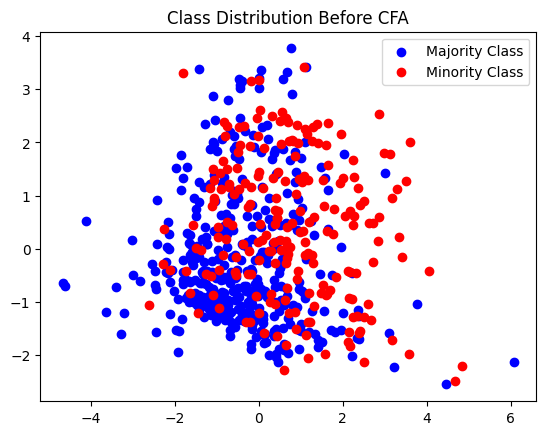

In [40]:
# Apply PCA to the original data (before CFA)
X_original_pca = pca.fit_transform(X_train)

# Plot all classes before CFA
plt.scatter(X_original_pca[y_train == majority_class, 0],
            X_original_pca[y_train == majority_class, 1],
            c='blue', label='Majority Class')
plt.scatter(X_original_pca[y_train == minority_class, 0],
            X_original_pca[y_train == minority_class, 1],
            c='red', label='Minority Class')
plt.legend()
plt.title("Class Distribution Before CFA")
plt.show()


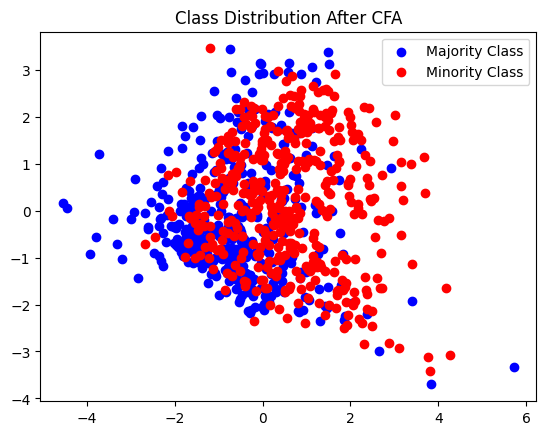

In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_augmented_pca = pca.fit_transform(X_train_augmented)

# Plot all classes
plt.scatter(X_augmented_pca[y_train_augmented == majority_class, 0],
            X_augmented_pca[y_train_augmented == majority_class, 1],
            c='blue', label='Majority Class')
plt.scatter(X_augmented_pca[y_train_augmented == minority_class, 0],
            X_augmented_pca[y_train_augmented == minority_class, 1],
            c='red', label='Minority Class')
plt.legend()
plt.title("Class Distribution After CFA")
plt.show()


In [39]:
# Calculate the mean for the majority class before and after CFA
majority_original_mean = majority_class_instances.mean(axis=0)
majority_augmented_mean = X_train_augmented[y_train_augmented != minority_class].mean(axis=0)

# Calculate the absolute difference between the original and augmented majority class
diff_majority = np.abs(majority_augmented_mean - majority_original_mean)
print("Mean Absolute Difference in Majority Class Features:\n", diff_majority)


Mean Absolute Difference in Majority Class Features:
 [0. 0. 0. 0. 0. 0. 0. 0.]


In [22]:
print(f"CFA Model AUC: {roc_auc}")
print(f"Baseline Model AUC: {roc_auc_baseline}")


CFA Model AUC: 0.8007346189164372
Baseline Model AUC: 0.813406795224977


In [23]:
print(f"CFA Model Accuracy: {accuracy_score_cfa}")
print(f"Baseline Model Accuracy: {accuracy_score_baseline}")

CFA Model Accuracy: 0.7532467532467533
Baseline Model Accuracy: 0.7272727272727273


In [24]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_augmented, y_train_augmented)

# Get the best parameters
print("Best parameters: ", grid_search.best_params_)



Best parameters:  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}



CFA
1.   xai -> important features
2.   counterfactual pairs finding
3.   calculate the diff between them
4.   apply that diff to new majority datapoint
5.   new data point is created .

